In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


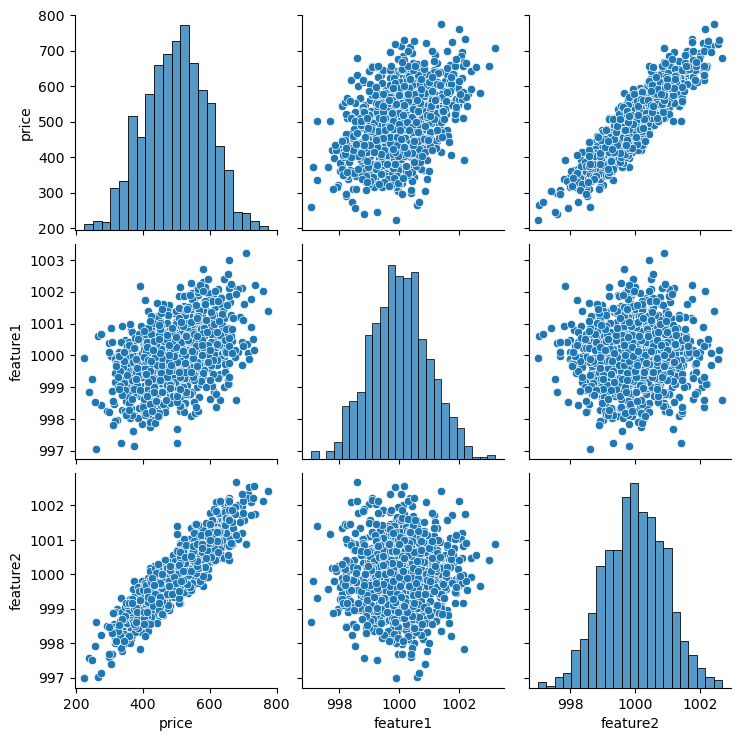

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values

In [7]:
y = df['price'].values

In [8]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [41]:
X_train.shape

(700, 2)

In [42]:
X_test.shape

(300, 2)

## Data processing

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [43]:
scaler = MinMaxScaler()

In [44]:
scaler.fit(X_train)

MinMaxScaler()

In [45]:
X_train = scaler.transform(X_train)

In [46]:
X_test = scaler.transform(X_test)

In [47]:
X_train.max()

1.0

## Trainng model

In [21]:
from tensorflow.keras.models import Sequential # set up senquential model and keep aading model to it
from tensorflow.keras.layers import Dense # dense layers

In [22]:
help(Sequential)

Help on class Sequential in module keras.src.engine.sequential:

class Sequential(keras.src.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8))
 |  model.add(tf.keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(s

In [23]:
help(Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of t

## Model layers - as a list of layers

In [24]:
model = Sequential([Dense(4, activation='relu'),
                   Dense(2,activation='relu'),
                   Dense(1)]) # Co 3 lop NN: lop dau co 4 units, lop2 co 2 unit, lop3 co 1 unit

## Model layers one by one

In [48]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1)) # cai all shell nay giong voi cai tren
model.compile(optimizer='rmsprop', loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [32]:
model.compile(optimizer='rmsprop', loss='mse')

In [49]:
model.fit(X_train,y_train, epochs =250)

Epoch 1/250
22/22 [==============================] - 1s 6ms/step - loss: 256608.1562
Epoch 2/250
22/22 [==============================] - 0s 4ms/step - loss: 256386.0156
Epoch 3/250
22/22 [==============================] - 0s 5ms/step - loss: 256123.3594
Epoch 4/250
22/22 [==============================] - 0s 5ms/step - loss: 255827.6875
Epoch 5/250
22/22 [==============================] - 0s 5ms/step - loss: 255484.7969
Epoch 6/250
22/22 [==============================] - 0s 5ms/step - loss: 255091.9531
Epoch 7/250
22/22 [==============================] - 0s 5ms/step - loss: 254653.2500
Epoch 8/250
22/22 [==============================] - 0s 4ms/step - loss: 254157.6875
Epoch 9/250
22/22 [==============================] - 0s 5ms/step - loss: 253603.5625
Epoch 10/250
22/22 [==============================] - 0s 5ms/step - loss: 252989.0312
Epoch 11/250
22/22 [==============================] - 0s 7ms/step - loss: 252310.9062
Epoch 12/250
22/22 [==============================] - 0s 5ms/st

22/22 [==============================] - 0s 5ms/step - loss: 827.4946
Epoch 98/250
22/22 [==============================] - 0s 5ms/step - loss: 797.3490
Epoch 99/250
22/22 [==============================] - 0s 4ms/step - loss: 768.6734
Epoch 100/250
22/22 [==============================] - 0s 4ms/step - loss: 738.9804
Epoch 101/250
22/22 [==============================] - 0s 5ms/step - loss: 712.6121
Epoch 102/250
22/22 [==============================] - 0s 4ms/step - loss: 685.5702
Epoch 103/250
22/22 [==============================] - 0s 5ms/step - loss: 656.3030
Epoch 104/250
22/22 [==============================] - 0s 4ms/step - loss: 628.5120
Epoch 105/250
22/22 [==============================] - 0s 4ms/step - loss: 600.7383
Epoch 106/250
22/22 [==============================] - 0s 5ms/step - loss: 578.7043
Epoch 107/250
22/22 [==============================] - 0s 4ms/step - loss: 552.6924
Epoch 108/250
22/22 [==============================] - 0s 4ms/step - loss: 529.6399
Epoch 10

22/22 [==============================] - 0s 4ms/step - loss: 24.6035
Epoch 196/250
22/22 [==============================] - 0s 4ms/step - loss: 24.6409
Epoch 197/250
22/22 [==============================] - 0s 6ms/step - loss: 24.4237
Epoch 198/250
22/22 [==============================] - 0s 7ms/step - loss: 23.9213
Epoch 199/250
22/22 [==============================] - 0s 5ms/step - loss: 24.5508
Epoch 200/250
22/22 [==============================] - 0s 5ms/step - loss: 24.2179
Epoch 201/250
22/22 [==============================] - 0s 4ms/step - loss: 24.4804
Epoch 202/250
22/22 [==============================] - 0s 6ms/step - loss: 24.3728
Epoch 203/250
22/22 [==============================] - 0s 5ms/step - loss: 24.3986
Epoch 204/250
22/22 [==============================] - 0s 5ms/step - loss: 24.3962
Epoch 205/250
22/22 [==============================] - 0s 5ms/step - loss: 24.1470
Epoch 206/250
22/22 [==============================] - 0s 6ms/step - loss: 24.4817
Epoch 207/250
22/2

In [50]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss
0,256608.156250
1,256386.015625
2,256123.359375
3,255827.687500
4,255484.796875
...,...
245,24.531004
246,24.224403
247,24.683237
248,24.626108


<Axes: >

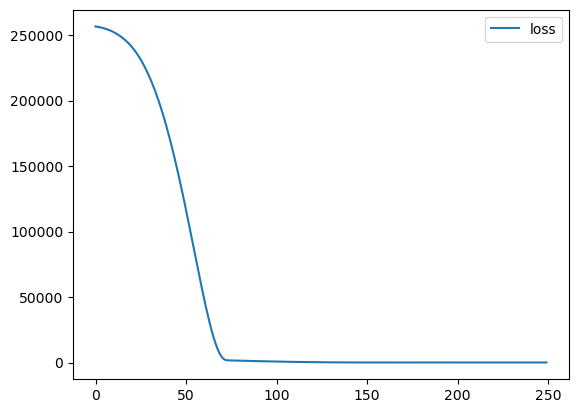

In [51]:
loss_df.plot()

In [ ]:
# cac parameters chua duoc tuning ro rang va ti le train/dev/test chua phu hop
# cau truc mang NN duoc set up ngau nhien 
#=> dan den viec model co hieu suat kem

## Evaluation Model

In [52]:
model.evaluate(X_test, y_test, verbose = 0)

24.864545822143555

In [53]:
model.evaluate(X_train, y_train, verbose = 0)

24.045562744140625

In [54]:
test_predict = model.predict(X_test)

10/10 [==============================] - 0s 4ms/step


In [55]:
test_predict

array([[405.0375 ],
       [623.311  ],
       [591.90027],
       [571.99066],
       [366.3577 ],
       [578.94556],
       [514.8099 ],
       [458.86224],
       [549.00726],
       [447.2734 ],
       [611.55597],
       [548.71155],
       [418.84906],
       [408.61743],
       [651.01886],
       [437.0513 ],
       [508.21335],
       [659.7049 ],
       [662.3584 ],
       [565.3037 ],
       [333.96658],
       [444.58585],
       [382.27094],
       [378.50012],
       [566.3604 ],
       [610.36115],
       [532.15216],
       [427.6109 ],
       [655.21783],
       [413.83136],
       [442.3892 ],
       [484.8846 ],
       [438.16617],
       [681.62506],
       [424.50958],
       [417.43454],
       [501.68857],
       [550.2394 ],
       [509.49094],
       [395.10178],
       [618.363  ],
       [416.3784 ],
       [604.21954],
       [445.7142 ],
       [501.74762],
       [581.4858 ],
       [668.7797 ],
       [490.1611 ],
       [318.3188 ],
       [485.1838 ],


In [56]:
test_predict = pd.Series(test_predict.reshape(300,))
pre_df = pd.DataFrame(y_test, columns = ['Test True Y'])
pre_df = pd.concat((pre_df, test_predict),axis =1 )
pre_df.columns = ['test true', 'predict']

In [57]:
pre_df

,test true,predict
0,402.296319,405.037506
1,624.156198,623.310974
2,582.455066,591.900269
3,578.588606,571.990662
4,371.224104,366.357697
...,...,...
295,525.704657,528.805054
296,502.909473,513.998596
297,612.727910,609.421753
298,417.569725,416.705170


<Axes: xlabel='test true', ylabel='predict'>

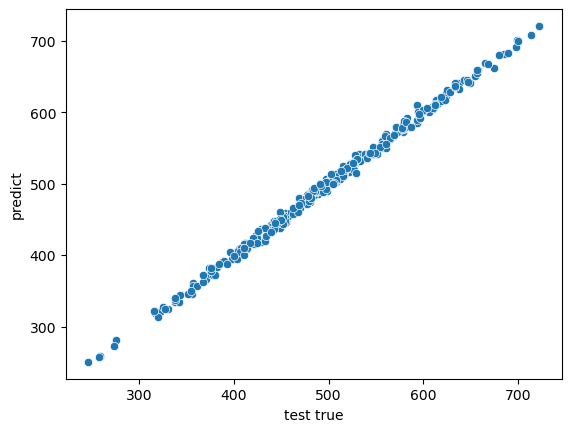

In [58]:
sns.scatterplot(x='test true', y='predict', data = pre_df)

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [60]:
mean_absolute_error(pre_df['test true'], pre_df['predict'])

3.994177931834525

In [62]:
df.describecribe()
# mean absolute error ở đây chỉ khoảng dưới 1% so với mean của price, điều này có nghĩa là kết quả khá tốt và khả thi

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [65]:
## rmse = mse**0.5
mean_squared_error(pre_df['test true'], pre_df['predict'])**0.5

4.986439398513011

## Predicting on new data

In [66]:
new_gem = [[998, 1000]]

In [68]:
# model train on scaler features
new_gem =scaler.transform(new_gem)

In [69]:
model.predict(new_gem)

1/1 [==============================] - 0s 62ms/step


array([[419.43365]], dtype=float32)

## Save and Load model

In [70]:
from tensorflow.keras.models import load_model

In [71]:
model.save('my_gem_model.h5')

C:\Users\assas\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [72]:
late_model = load_model('my_gem_model.h5')

In [73]:
late_model.predict(new_gem)

1/1 [==============================] - 0s 142ms/step


array([[419.43365]], dtype=float32)